In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

## EDA

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### 1 --> Unhealthy Heart
#### 0 --> Healthy Heart

Ploting the distribution plot

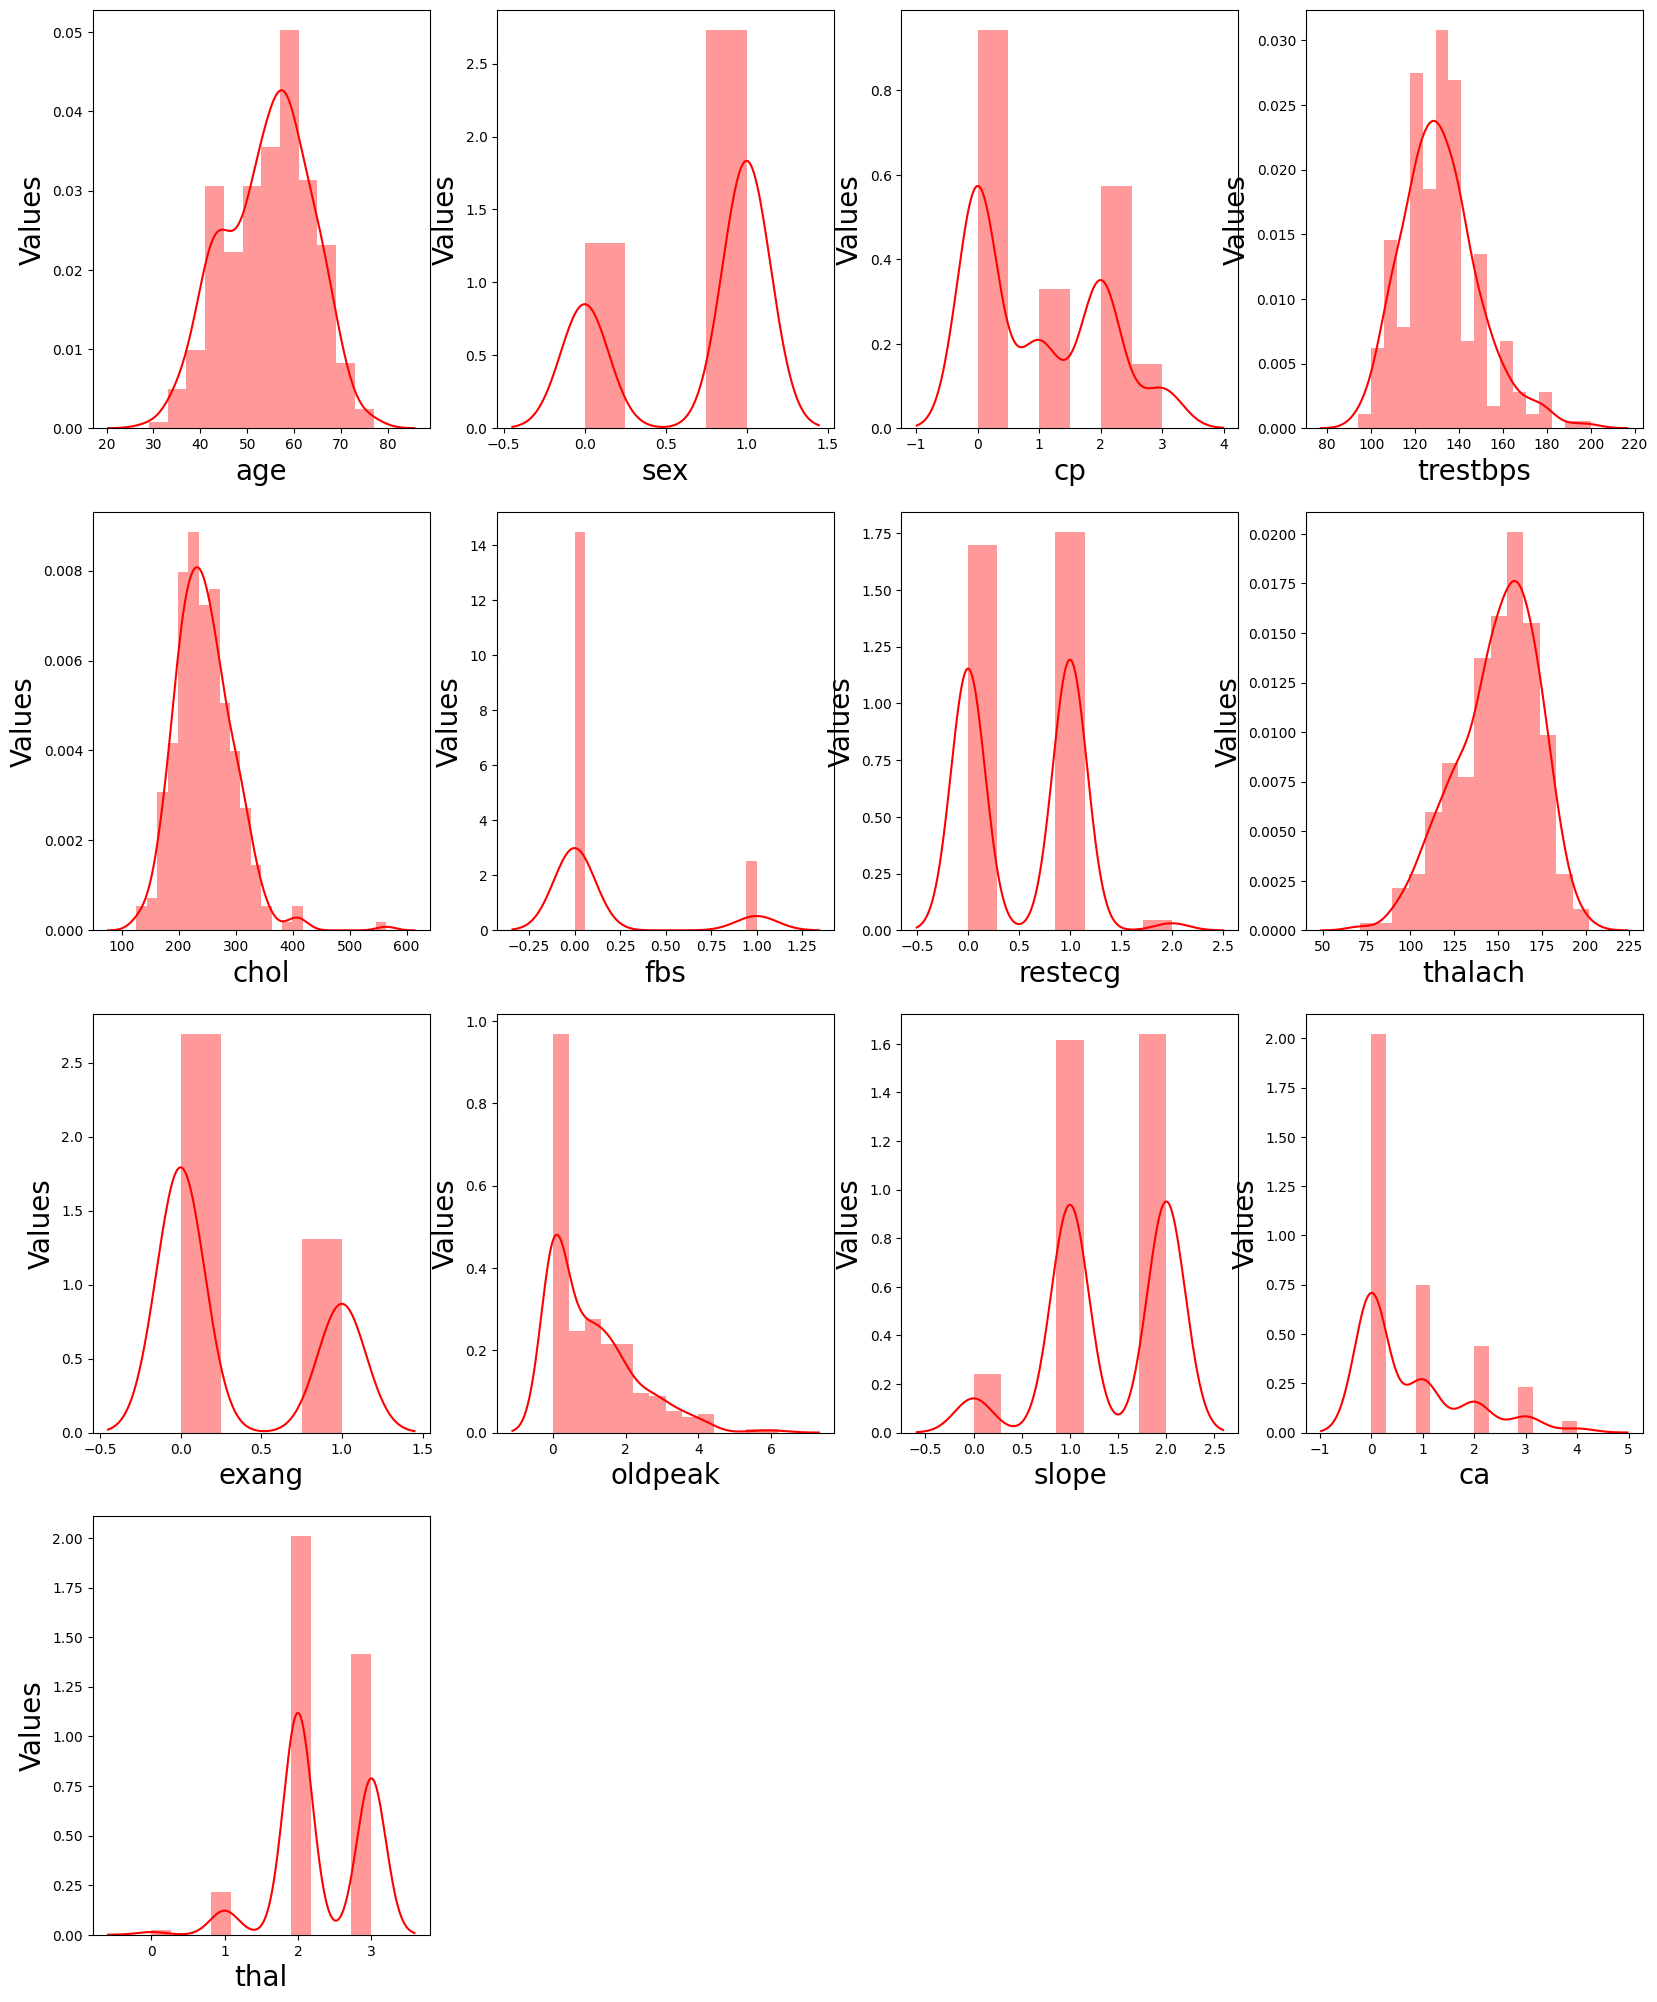

In [9]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Values',fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

Splitting the data into Features and Target

In [13]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [14]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1
1,37,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2
2,41,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2
3,56,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2
4,57,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,4.941642,5.484797,0,1,4.812184,1,0.2,1,0,3
299,45,1,3,4.700480,5.575949,0,1,4.882802,0,1.2,1,0,3
300,68,1,0,4.969813,5.262690,1,1,4.948760,0,3.4,1,2,3
301,57,1,0,4.867534,4.875197,0,1,4.744932,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Splitting the data into training and testing data

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (242, 13) (61, 13)


In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 30.9 KB


## Implementing Algoritms 

## Logistic Regression

In [20]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

acc=accuracy_score(y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 85.37735849056604 %
Testing accuracy score of the model is: 79.12087912087912 %


In [21]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))

Confusion matrix of the model [[32 12]
 [ 7 40]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.73      0.77        44
           1       0.77      0.85      0.81        47

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



## KNN KNearestNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_train,y_train)

y_pred1 = knn.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['KNN']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 85.84905660377359 %
Testing accuracy score of the model is: 75.82417582417582 %


In [23]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

Confusion matrix of the model [[29 15]
 [ 7 40]]
Classification Report               precision    recall  f1-score   support

           0       0.81      0.66      0.72        44
           1       0.73      0.85      0.78        47

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91



## SVM

In [24]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred2 = svc.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 55.660377358490564 %
Testing accuracy score of the model is: 51.64835164835166 %


In [25]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred2))

print("Classification Report",classification_report(y_test,y_pred2))

Confusion matrix of the model [[ 0 44]
 [ 0 47]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

    accuracy                           0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91



## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred3 = dtc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 74.72527472527473 %


In [27]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

Confusion matrix of the model [[33 11]
 [12 35]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.75      0.74        44
           1       0.76      0.74      0.75        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [31]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 2, splitter= 'random')
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, splitter='random')

In [32]:
y_pred4 = dtc2.predict(x_test)
acc4=accuracy_score(y_test,y_pred4)
accuracies['DT2']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc2.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 72.52747252747253 %


In [33]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred4))

print("Classification Report",classification_report(y_test,y_pred4))

Confusion matrix of the model [[34 10]
 [15 32]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.77      0.73        44
           1       0.76      0.68      0.72        47

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.72        91



In [34]:
# update dictionary
accuracies['DT']=acc4*100
del accuracies['DT2']

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF']=acc5*100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 97.16981132075472 %
Testing accuracy score of the model is: 83.51648351648352 %


In [36]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

Confusion matrix of the model [[33 11]
 [ 4 43]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



## Gradient Boosting


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.05, loss = 'log_loss', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 79.12087912087912 %


## Modelling for Streamlit

In [42]:
# import pickle
# model = rfc
# pickle.dump(model, open("heart.pkl",'wb'))